In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:

#Se lee el dataset desde un formato CSV
df_redes = pd.read_csv('C:\\Users\\braya\\Desktop\\BIT_IBERO\\BOOT_OFI\\Repo\\BOOTCAMP_DATA_SCIENCE\\Ejercicios Clase\\Clase 03-06\\Students Social Media Addiction.csv')
#Mostrar las primeras 5 filas del dataset
print("Punto 1: Lectura del archivo descargado de Kaggel sobre la tematica de \"La adicción de los estudiantes a las redes sociales\"")
df_redes.head()

## LA PREGUNTA A RESPONDER ES ¿CUAL ES LA MEJOR RED SOCIAL PARA UNA PUBLICIDAD PARA IMPACTAR A UNA MUJER DE 18 AÑOS?

Punto 1: Lectura del archivo descargado de Kaggel sobre la tematica de "La adicción de los estudiantes a las redes sociales"


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
print('Shape / Forma:', df_redes.shape)  # Forma del dataset (filas, columnas)
print("-------------------------------------------------------------\n")
df_redes.info() # Información de como está construido el dataset
print("-------------------------------------------------------------\n")
##df_redes.describe() # Estádisticas descriptivas de las columnas númericas

Shape / Forma: (705, 13)
-------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 n

In [6]:
print(f"Valores unicos del campo de redes sociales son: {df_redes['Most_Used_Platform'].unique()}")

Valores unicos del campo de redes sociales son: ['Instagram' 'Twitter' 'TikTok' 'YouTube' 'Facebook' 'LinkedIn' 'Snapchat'
 'LINE' 'KakaoTalk' 'VKontakte' 'WhatsApp' 'WeChat']


In [20]:


#Variable de las redes sociales a incluir en el analisis

redes_sociales = ['Instagram','TikTok','Facebook','WhatsApp','LinkedIn','X']

# Limpieza de datos con pd, se reemplaza Twitter por el actual nombre X
df_redes['Most_Used_Platform'] = df_redes['Most_Used_Platform'].replace('Twitter','X')

# Se usa la funcion de pd .isin para aplicar un bool a los campos que deseo filtrar y luego lo paso por un nuevo df
filtro_redes = df_redes['Most_Used_Platform'].isin(redes_sociales)

df_redes_filtred = df_redes[filtro_redes]

# Agrupacion de redes sociales totales
conteo_plataformas = df_redes_filtred.groupby('Most_Used_Platform').size()

# Se ordena de manera descendente
conteo_ordenado = conteo_plataformas.sort_values(ascending=False)

df_redes_filtred




,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,X,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,22,Male,Graduate,UK,6.2,X,Yes,6.3,5,Single,4,8
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,704,24,Male,Graduate,Japan,4.3,X,No,7.5,8,Single,2,4


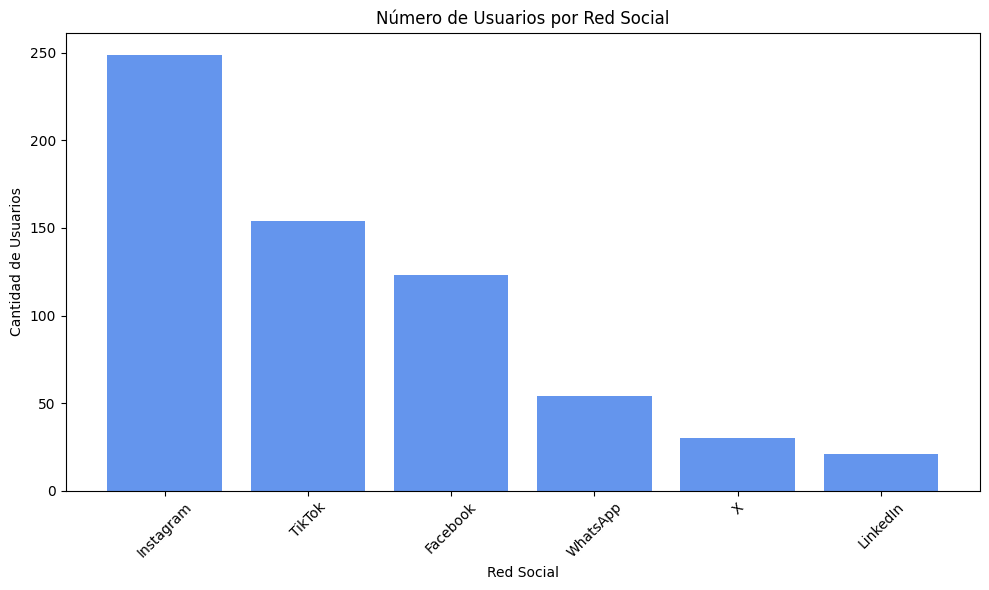

In [17]:
# --- CREACIÓN DE LA GRÁFICA ---

# Se crea la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.bar(conteo_ordenado.index, conteo_ordenado.values, color='cornflowerblue')

# Añadir títulos y etiquetas para que sea más claro
plt.title('Número de Usuarios por Red Social')
plt.xlabel('Red Social')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45) # Rotar etiquetas del eje X para mejor lectura
plt.tight_layout() # Ajustar para que todo encaje

# Mostrar la gráfica
plt.show()


In [23]:
df_mujeres = df_redes_filtred[df_redes_filtred['Gender'] == 'Female']

group_redes = df_mujeres.groupby('Most_Used_Platform').size()

conteo_mujeres_ordenado = group_redes.sort_values(ascending=False)

conteo_mujeres_ordenado

Most_Used_Platform
Instagram    172
TikTok        86
Facebook      24
X             16
WhatsApp      11
LinkedIn       8
dtype: int64

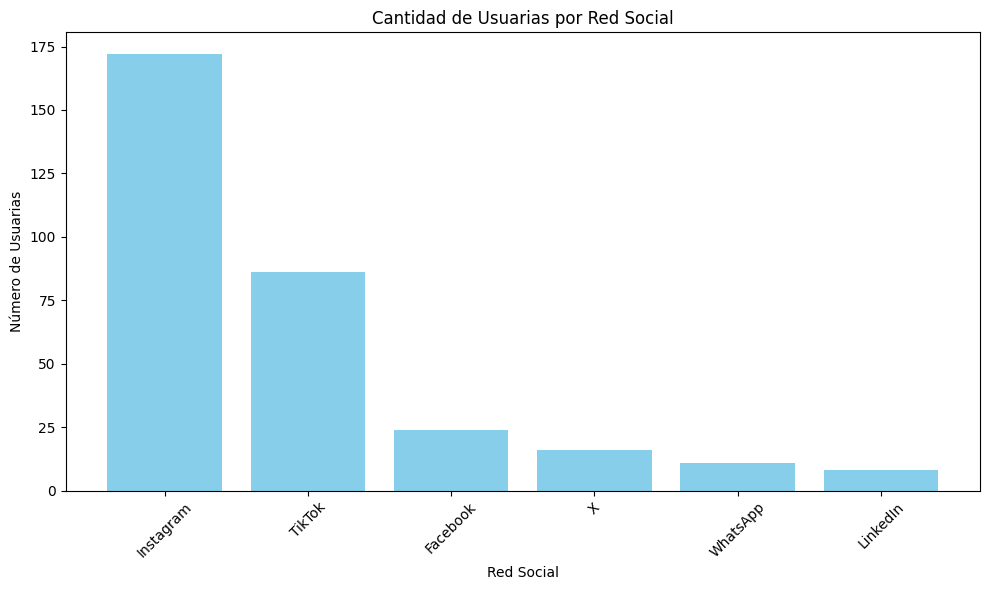

In [24]:
# --- CREACIÓN DE LA GRÁFICA ---

# Se crea la figura y los ejes para el gráfico
plt.figure(figsize=(10, 6)) # Define el tamaño del gráfico (ancho, alto)

# Se crea el gráfico de barras
# .index tiene los nombres de las plataformas (eje X)
# .values tiene los conteos (eje Y)
plt.bar(conteo_mujeres_ordenado.index, conteo_mujeres_ordenado.values, color='skyblue')

# Se añaden títulos y etiquetas para mayor claridad
plt.title('Cantidad de Usuarias por Red Social')
plt.xlabel('Red Social')
plt.ylabel('Número de Usuarias')
plt.xticks(rotation=45) # Rota las etiquetas del eje X para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo encaje bien

# Se muestra la gráfica
plt.show()